In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'lowgr_tng100B_099S_0A_800R/results/'
hisubfile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hiptlfile = pkl.load(open(path + 'hiptlgrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
vnfile = pkl.load(open(path + 'vngrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))

# midpath = base + 'midgr_tng100B_099S_0A_1200R/results/'
# midhisubfile = pkl.load(open(midpath + 'hisubhalogrid_tng100B_099S_0A_1200R.pkl_rlib.pkl', 'rb'))
# midhiptlfile = pkl.load(open(midpath + 'hiptlgrid_tng100B_099S_0A_1200R.pkl_rlib.pkl', 'rb'))
# midvnfile = pkl.load(open(midpath + 'vngrid_tng100B_099S_0A_1200R.pkl_rlib.pkl', 'rb'))

In [3]:
flib_og = FigureLibrary(hisubfile, 'pk')
flib_og.addResults(hiptlfile)
flib_og.addResults(vnfile)
# flib_og.addResults(midhisubfile)
# flib_og.addResults(midhiptlfile)
# flib_og.addResults(midvnfile)

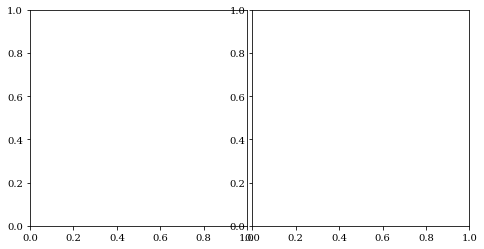

In [4]:
flib = copy.copy(flib_og)
flib.createFigGrid(1, 2, panel_length = 3)
fig_no_ratio, panels = flib.getFig()

# HI auto power spectrum

In [5]:
# get the desired power spectra
ip = {}
ip['grid_resolution'] = 800
ip['fieldname'] = ['hisubhalo', 'hiptl', 'vn']
ip['HI_res'] = 'diemer'
figarr = flib.arrangeResults(ip, 'snapshot', [99], 'space', ['real', 'redshift'], 'fieldname')

In [6]:
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        flib.plotFill(idx, {'fieldname':'hisubhalo'}, 
                      fill_kwargs = {'color':'orange', 'label':'Galaxies'})
        
        flib.plotFill(idx, {'fieldname':'hiptl'}, 
                      fill_kwargs = {'color':'cornflowerblue', 'label':'Particles\nin Galaxies'})
        flib.plotLine(idx, {'fieldname':'vn'}, 
                      line_kwargs = {'color':'green', 'label':'Particles'})

In [7]:
# axes
flib.xLimAdjustToNyquist(shift = 6)
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':11, 'loc':'lower right'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI}', txt_kwargs = axiskw)

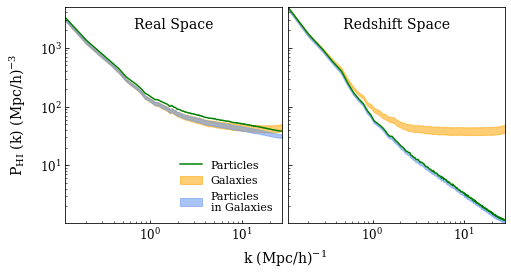

In [8]:
fig_no_ratio

In [9]:
fig_no_ratio.savefig('HI_auto_no_subpanel_large.pdf')

[0.1308641975308642, 0.21200000000000002, 0.12222222222222223, 0.198]


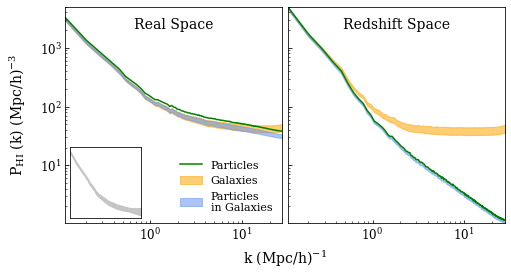

In [10]:
smallsize = flib.panel_length * (0.33)
xstart = (flib.xborder[0] + flib.panel_length*0.02)/flib.figsize[0]
xend =xstart + smallsize/flib.figsize[0]

ystart = (flib.yborder[1] + flib.panel_length * 0.02)/flib.figsize[1]
yend = ystart + smallsize/flib.figsize[1]
smallpos = [xstart, ystart, smallsize / flib.figsize[0], smallsize / flib.figsize[1]]
small_left = fig_no_ratio.add_axes(smallpos, zorder = 2)
small_left.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, labelbottom = False,
                       labelleft=False)
flib.plotFill((0,0), {'is_auto':True}, figarr[0,0], ax = small_left, fill_kwargs = {'color':'silver', 'alpha':0.9} )
small_left.loglog()
xlim = flib.panels[0,0].get_xlim()
small_left.set_xlim(xlim[0], xlim[1])
print(smallpos)
fig_no_ratio

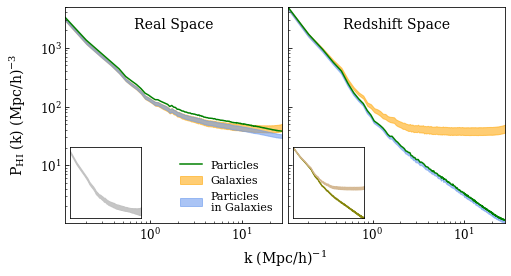

In [11]:
xstart = (flib.xborder[0] + flib.panel_length*1.02 + flib.panel_bt[0])/flib.figsize[0]
xend =(xstart) + smallsize/flib.figsize[0]
ystart = (flib.yborder[1] + flib.panel_length * 0.02)/flib.figsize[1]
yend = ystart + smallsize/flib.figsize[1]
smallpos = [xstart, ystart, smallsize/flib.figsize[0], smallsize/flib.figsize[1]]
right_panel = fig_no_ratio.add_axes(smallpos, zorder = 3)
right_panel.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, labelbottom = False,
                       labelleft=False)
xlim = flib.panels[0,0].get_xlim()
right_panel.set_xlim(xlim[0], xlim[1])
flib.plotFill((0,0), {'is_particle':True}, figarr[0,1], ax = right_panel, fill_kwargs = {'color':'olive', 'alpha':0.9} )
flib.plotFill((0,0), {'is_particle':False}, figarr[0,1], ax = right_panel, fill_kwargs = {'color':'tan', 'alpha':0.9} )
right_panel.loglog()
xlim = flib.panels[0,1].get_xlim()
ylim = flib.panels[0,1].get_ylim()
right_panel.set_xlim(xlim[0], xlim[1])
right_panel.set_ylim(ylim[0], ylim[1])
fig_no_ratio

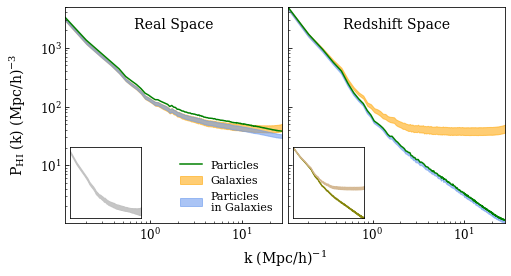

In [12]:
fig_no_ratio

In [13]:
fig_no_ratio.savefig('HI_auto_with_subpanels.pdf')

# With Ratios

In [10]:

ratfigarr = np.empty((2,2), dtype = object)

vnreal = flib.getMatchingResults({'fieldname':'vn', 'space':'real', 'grid_resolution':800}, {})[0]
vnred = flib.getMatchingResults({'fieldname':'vn', 'space':'redshift', 'grid_resolution':800}, {})[0]

ratfigarr[0, :] = figarr[0, :]
ratfigarr[1,0] = []; ratfigarr[1,1] = []
denom = [vnreal, vnred]
for i in range(2):
    for j in range(len(figarr[0, i])):
        pres = PostResult()
        pres.computeRatio(figarr[0, i][j], denom[i])
        ratfigarr[1, i].append(pres)

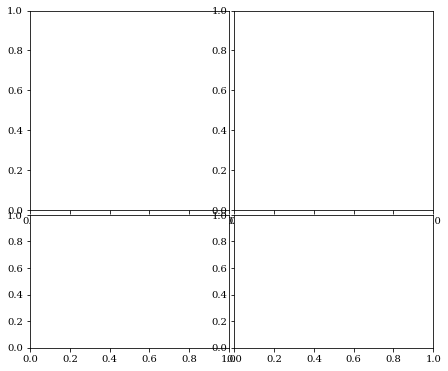

In [11]:

flib = copy.copy(flib_og)
flib.createFigGrid(2, 2, panel_length = 2.75, height_ratios = [3, 2])
flib.setResultArray(ratfigarr)
flib.panelprop = 'fieldname'
fig_ratio, panels = flib.getFig()


In [12]:
ylabels = [r'P$_{\rm{HI}}$ (k) (Mpc/h)$^{-3}$', 'Particles Ratio']
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        if not idx == (1,1):
            flib.plotFill(idx, {'fieldname':'hisubhalo'}, 
                      fill_kwargs = {'color':'orange', 'label':'Galaxies'})
        
        flib.plotFill(idx, {'fieldname':'hiptl'}, 
                      fill_kwargs = {'color':'green', 'label':'Galaxy Particles'})
        xlim = panels[idx].get_xlim()
        if i == 0:
            flib.plotLine(idx, 'vn', 
                      line_kwargs = {'color':'purple', 'label':'Particles'})
        else:
            panels[idx].plot([xlim[0], xlim[1]], [1, 1], linestyle = '--', color = 'gray')
        
        if j == 0:
            flib.labelPanelAxis(idx, 'y', ylabels[i], {'fontsize':14})

In [13]:
ratio_panels = [(1,1), (1,0)]
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis(panel_exceptions = ratio_panels)
flib.logAxis(which = 'x')

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'lower left'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
# flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
# axiskw['rotation'] = 'vertical'
# flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI}', txt_kwargs = axiskw)

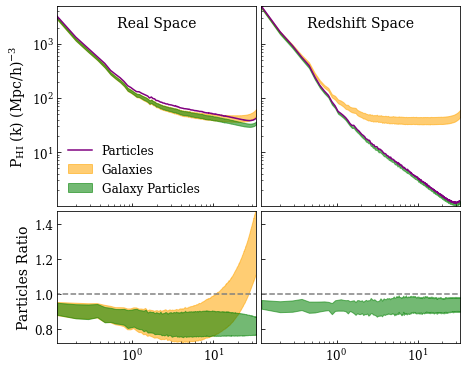

In [14]:
fig_ratio

In [15]:
fig_ratio.savefig('HI_auto_pk_with_ratio.pdf')

# For Presentations (combined):

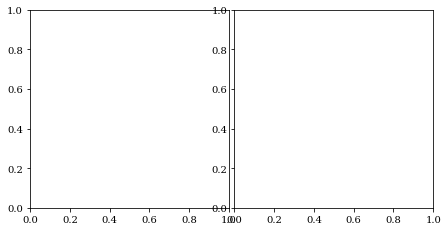

In [50]:
flib.clf()
flib = copy.copy(flib_og)
flib.createFigGrid(1, 2, panel_length = 2.75)
fig_combine, panels = flib.getFig()

In [51]:
# get the desired power spectra
ip = {}
ip['grid_resolution'] = 800
ip['fieldname'] = ['hisubhalo', 'hiptl', 'vn']
ip['HI_res'] = 'diemer'
figarr = flib.arrangeResults(ip, 'snapshot', [99], 'space', ['real', 'redshift'], 'fieldname')

In [52]:
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        if j == 0:
            flib.plotFill(idx, {'is_hydrogen':True},
                      fill_kwargs = {'color':'gray', 'label':'All'})
        else:
            flib.plotFill(idx, {'is_particle':True},
                         fill_kwargs = {'color':'green', 'label':'Particles'})
            flib.plotFill(idx, {'fieldname':'hisubhalo'},
                         fill_kwargs = {'color':'orange', 'label':'Galaxies'})
        

In [53]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'lower left'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend((0,1), kwargs = legkw)
flib.addLegend((0,0), kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI}', txt_kwargs = axiskw)

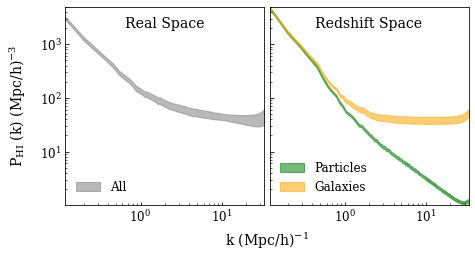

In [54]:
fig_combine

In [55]:
fig_combine.savefig('HI_auto_pk_combined.pdf')